In [219]:
#[0]
import numpy as np
from gensim.models.keyedvectors import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import datapath, get_tmpfile
import json #https://stackoverflow.com/questions/7100125/storing-python-dictionaries
import pickle #https://stackoverflow.com/questions/11218477/how-can-i-use-pickle-to-save-a-dict
import os
#[1]
from sklearn.manifold import MDS
from scipy.spatial import procrustes
import matplotlib.pyplot as plt

%matplotlib inline

#[2]
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

#[3]
from sklearn import decomposition
from scipy.spatial import distance_matrix


from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import Isomap

from mpl_toolkits import mplot3d

In [220]:
emb = get_emotion_embedding()

In [221]:
# mds = MDS(n_components=200,n_init=50)
# emb = mds.fit_transform(emb)

In [228]:
a = distance_matrix(emb,emb)
resultados_vdd = []
x = []
for dim in range(1,15):
    x+= [dim]
    mds = MDS(n_components=dim,n_init=50)
    X = mds.fit_transform(emb)
    b = distance_matrix(X,X)
    resultados_vdd += [calcula_stress(b,a)]
#     resultados_vdd += [mds.stress_]


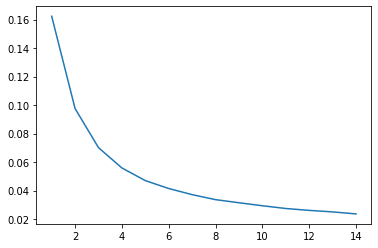

In [229]:
plt.plot(x,resultados_vdd)

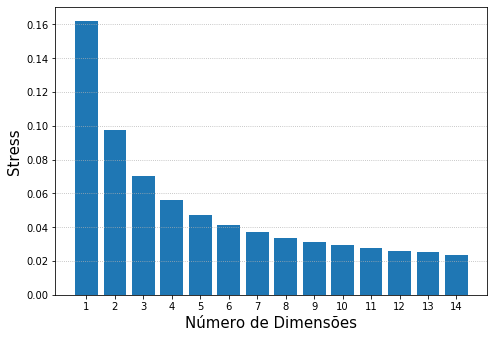

In [267]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xticks(x)
ax.bar(x,resultados_vdd)
ax.set_xlabel("Número de Dimensões",fontsize=15)
ax.set_ylabel("Stress",fontsize=15)
ax.grid(which='major', axis='y', linestyle=':')
ax.yaxis.grid(True)
plt.show()

In [237]:
from sklearn.decomposition import PCA

In [244]:
pca = PCA()

In [245]:
pca.fit(emb)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [254]:
a = pca.explained_variance_ratio_[0:14]
b = [i+1 for i in range(0,len(a))]

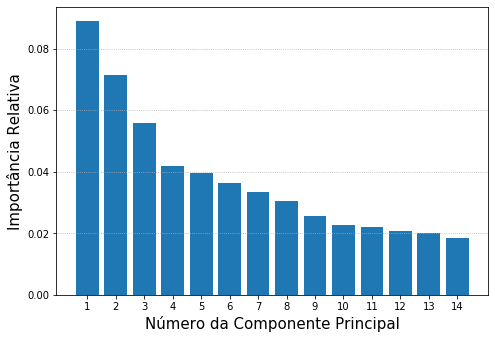

In [270]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xticks(b)
ax.bar(b,a)
ax.set_xlabel("Número da Componente Principal",fontsize=15)
ax.set_ylabel("Importância Relativa",fontsize=15)
ax.grid(which='major', axis='y', linestyle=':')
ax.yaxis.grid(True)
plt.show()



In [243]:
emb

[array([ 0.00464104,  0.01365361,  0.01066254, ...,  0.00127282,
        -0.0021462 , -0.00298657]),
 array([ 0.00488174,  0.00927616,  0.00314084, ..., -0.009125  ,
         0.00763929, -0.00633027]),
 array([-0.00468784, -0.00060067, -0.00094377, ...,  0.00206286,
        -0.01347083, -0.00265215]),
 array([-1.20796027e-02,  8.57576241e-03, -4.02577263e-03, ...,
         8.70464645e-03, -8.39233449e-05,  8.25028076e-03]),
 array([ 0.00901468, -0.01024401, -0.01034131, ..., -0.0023637 ,
        -0.00121143, -0.00569292]),
 array([-0.00295189, -0.00270308, -0.0020473 , ...,  0.00672849,
        -0.00515991,  0.00258526]),
 array([ 0.00109836, -0.00449292,  0.00091216, ...,  0.01109292,
         0.00260368, -0.00133211]),
 array([-0.00348601, -0.00326725, -0.00297004, ...,  0.01133374,
        -0.00308721,  0.00253077]),
 array([ 0.00785212,  0.00323554, -0.01041221, ...,  0.00316206,
         0.00524148,  0.00678715]),
 array([ 0.00271595,  0.01023889, -0.009944  , ..., -0.00028897,
  

In [185]:


tmp = np.array(emb).copy()

for i in range(7):
    x = np.random.randint(len(tmp))
    y = np.random.randint(len(tmp))
    x_t = tmp[x].copy()
    y_t = tmp[y].copy()
    tmp[x] = y_t
    tmp[y] = x_t
tmp = tmp.T
    
for i in range(7):
    x = np.random.randint(len(tmp))
    y = np.random.randint(len(tmp))
    x_t = tmp[x].copy()
    y_t = tmp[y].copy()
    tmp[x] = y_t
    tmp[y] = x_t
tmp = tmp.T


resultados_f = []
x = []

a = distance_matrix(emb,emb)


for dim in range(1,15):
    x+= [dim]
    mds = MDS(n_components=dim,n_init=15)
    X = mds.fit_transform(tmp)
    b = distance_matrix(X,X)
#     resultados_f += [calcula_stress(a,b)]
    resultados_f += [mds.stress_]




In [202]:
tmp = emb.reshape((len(emb)*len(emb[0])))
rnd = np.zeros_like(emb)
for i in range(len(rnd)):
    for j in range(len(rnd[0])):
        rnd[i][j] = tmp[np.random.randint(len(tmp))]

In [204]:
a = distance_matrix(rnd,rnd)

resultados_r = []
x = []



for dim in range(1,15):
    x+= [dim]
    mds = MDS(n_components=dim,n_init=15,random_state=0)
    X = mds.fit_transform(rnd.copy())
    b = distance_matrix(X,X)
#     resultados_r += [calcula_stress(a,b)]
    resultados_r += [mds.stress_]





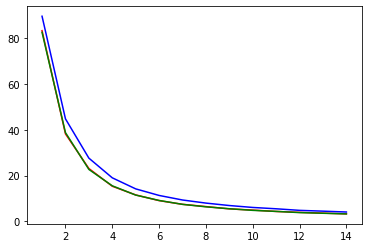

In [205]:
plt.plot(x,resultados_f,color='r')
plt.plot(x,resultados_vdd,color='g')
plt.plot(x,resultados_r,color='b')

In [156]:
resultados_vdd

[83.87210077926366,
 39.7104458012094,
 22.884531841599433,
 15.523560884445828,
 11.44846708292727,
 9.131432763061087,
 7.618969798363343,
 6.4688360142977395,
 5.581830381013031,
 4.894643895732797,
 4.405490895947185,
 3.987134197314382,
 3.587983533829746,
 3.344076963931986]

In [2]:
def get_emotion_embedding():
    return get_emb_concat()

def get_final_embs(dimensions = 200):
    embs = get_clean_embeddings()
    embs += [get_emb_soma()]
    embs += [get_emb_concat()]


    mds = MDS(n_components=dimensions)
    #Trata embeddings, filtrando somente os sentimentos principais e colocando no numero minimo de dimensoes
    embeddings = []
    for i in range(len(embs)):
        transformed_embedding = mds.fit_transform(embs[i])
        embeddings += [transformed_embedding]
    embs = embeddings

    for a in range(len(embs)):
        for b in range(len(embs)):
            embs[a],embs[b],r = procrustes(embs[a],embs[b])
    for i in range(200):
        a = np.random.randint(len(embs))
        b = np.random.randint(len(embs))
        embs[a],embs[b],r = procrustes(embs[a],embs[b])
    return embs

def calcula_stress_embeddings(d_original, d_proposta):
    d_original = distance_matrix(d_original,d_original)
    d_proposta = distance_matrix(d_proposta,d_proposta)
    a = np.sum((d_original-d_proposta)**2)
    b = np.sum(d_original**2)
    return np.sqrt(a/b)/4

def calcula_stress(d_original, d_proposta):
    a = np.sum((d_original-d_proposta)**2)
    b = np.sum(d_original**2)
    return np.sqrt(a/b)/4

def get_emb_soma():
    embeddings = get_clean_embeddings()
    sentiments = get_sentiments()
    assemble_embeddings_soma = np.zeros_like(embeddings[0])
    for i in embeddings:
        for c in range(75):
            assemble_embeddings_soma[c] = assemble_embeddings_soma[c] + i[c]
    return assemble_embeddings_soma

def get_emb_concat():
    embeddings = get_clean_embeddings()
    sentiments = get_sentiments()
    assemble_embeddings_concat = []

    for c in range(len(sentiments)):
        tmp = np.array([])
        for i in embeddings:
            tmp = np.concatenate((tmp,i[c]))
        assemble_embeddings_concat += [tmp]
    return assemble_embeddings_concat


def get_emb_media():
    #média dos vetores e retirando outliers
    embeddings = get_clean_embeddings()
    sentiments = get_sentiments()
    assemble_embeddings_media = np.zeros_like(embeddings[0])
    vec = []
    dist = []
    for c in range(75):
        tmp = np.array([])
        vec = []
        for i in embeddings:
            vec += [i[c]]

        centroid = np.zeros_like(vec[0])
        for i in vec:
            centroid = centroid + i
        centroid = centroid/len(vec)

        dist = []
        for i in vec:
            dist += [np.linalg.norm(i-centroid)]

        limitante_distancia_para_corte = np.max(dist)

        counter = 0
        for n,i in enumerate(embeddings):
            if dist[n]!=limitante_distancia_para_corte:
                assemble_embeddings_media[c] += i[c] 
                counter+=1

        assemble_embeddings_media[c] = assemble_embeddings_media[c]/counter
    return assemble_embeddings_media


def get_clean_embeddings():
#Seleciona somente os vetores principais das nossas embeddings
    sentiments = get_sentiments()
    raw_embeddings = []
    dimensions_size = []
    for i in range(4):
        tmp = get_vectors_embedding(i)
        raw_embeddings += [tmp]
        dimensions_size+=[len(get_sentiment_vector(tmp,sentiments[0]))]
#Faz o corte para o menor tamanho de dimensão
    n_dimensions = np.min(dimensions_size)
    # n_dimensions = 10
    mds = MDS(n_components=n_dimensions)
#Trata embeddings, filtrando somente os sentimentos principais e colocando no numero minimo de dimensoes
    embeddings = []
    for i in range(4):
        tmp_embedding = []
        for s in sentiments:
            tmp_embedding += [get_sentiment_vector(raw_embeddings[i],s)]
        transformed_embedding = mds.fit_transform(tmp_embedding)
        embeddings += [transformed_embedding]
    # Calcula erro entre nossos modelos
    for a in range(len(embeddings)):
        for b in range(len(embeddings)):
            embeddings[a],embeddings[b],r = procrustes(embeddings[a],embeddings[b])
    return embeddings

def print_anotado(emb):
    fig, ax = plt.subplots(figsize=(15,15))
    ax.scatter(emb[:,0], emb[:,1])
    n = get_sentiments()
    
    for i, txt in enumerate(n):
        ax.annotate(" "+txt, (emb[:,0][i], emb[:,1][i]))

def print_anotado2(emb):
    fig, ax = plt.subplots(figsize=(15,15))
    for e in emb:
        ax.scatter(e[:,0], e[:,1])
        n = get_sentiments()

        for i, txt in enumerate(n):
            ax.annotate(txt, (e[:,0][i], e[:,1][i]))

def print_2d(embs):
    res = []
    mds_2 = MDS(n_components=2)
    for e in embs:
        res += [mds_2.fit_transform(e)]
    for p in res:
        plt.scatter(p[:,0],p[:,1])

def get_sentiment_vector(embedding, sentiment):
    return embedding[sentiment]["vectors"][sentiment]

def get_vectors_embedding(n):
    files = os.listdir("models")
    model_file_name = []
    for file in files:
        model_file_name += [file]
    escolhidos = [model_file_name[14],model_file_name[5],model_file_name[7],model_file_name[3]]
    with open("models/"+escolhidos[n], 'rb') as handle:
        b = pickle.load(handle)
    return b

def get_sentiments_old():
    sentiments = np.load("./sentiments_list.npy")
    return sentiments
def get_sentiments():
    sentiments = np.load("./sentiments_list.npy")
    sentiments = np.concatenate((sentiments[:26],sentiments[27:]))
    return sentiments